In [30]:
from dataprocess.kdd_cup99 import KDD_CUP_99_DataLoader
# from dataprocess.unsw_nb15 import UNSW_NB15_DataLoader
from net.CNN import CNN, CNN_2_linear
from net.multCNN import multCNN

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
# from torch.utils.tensorboard import SummaryWriter

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
import os 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]='0'

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [33]:
# for kdd_cup99
dataset = KDD_CUP_99_DataLoader('E:/DataSets/kddcup.data', 256, 'Test')
data_labels = dataset.data.to_num_column_dic[41].keys()
class_num = len(data_labels)
discrete_column_idx = dataset.data.discrete_column
discrete_column_idx.remove(41)
continuous_column_idx = [i for i in range(41) if i not in discrete_column_idx]
input_channel_kind = len(discrete_column_idx)
input_channel_num = len(continuous_column_idx)

print(discrete_column_idx, continuous_column_idx, data_labels)

[1, 2, 3, 11, 13, 14, 20, 21] [0, 4, 5, 6, 7, 8, 9, 10, 12, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40] dict_keys([b'smurf.', b'neptune.', b'normal.', b'satan.', b'ipsweep.', b'portsweep.', b'nmap.', b'back.', b'warezclient.', b'teardrop.', b'pod.', b'guess_passwd.', b'buffer_overflow.', b'land.', b'warezmaster.', b'imap.', b'rootkit.', b'loadmodule.', b'ftp_write.', b'multihop.', b'phf.', b'perl.', b'spy.'])


In [5]:
# # dataset = KDD_CUP_99_DataLoader('E:/DataSets/kddcup.data', 256, 'Test')
# dataset = UNSW_NB15_DataLoader('E:/DataSets/UNSW-NB15 - CSV Files', 256, 'Test')
# labels = dataset.data.label_dic.keys()
# class_num = len(labels)
# discrete_column_idx = dataset.data.discrete_column
# discrete_column_idx.remove(47)
# discrete_column_idx.remove(48)
# continuous_column_idx = [i for i in range(47) if i not in discrete_column_idx]
# input_channel_kind = len(discrete_column_idx)
# input_channel_num = len(continuous_column_idx)
# print(discrete_column_idx, continuous_column_idx, labels)

In [6]:
# U2R_list = [b'loadmodule.', b'buffer_overflow.', b'perl.', b'rootkit.']
# # index = dataset.data.to_num_column_dic[41]
# # print(index)
# U2R_indices = [12, 16, 17, 21]

In [34]:
log_file = 'history/CNN_2_linear/KDD_CUP99_Adam/plot/confusion_matrix/5_6'
if not os.path.isdir(log_file):
    os.makedirs(log_file)

In [38]:
ckpt_file = 'history/CNN_2_linear/KDD_CUP99_Adam/checkpoint/5_6/ckpt_best_39.pth'
net = CNN_2_linear(input_channel_num + input_channel_kind, class_num).to(device)
checkpoint = torch.load(ckpt_file)
net.load_state_dict(checkpoint['net'])

<All keys matched successfully>

In [39]:
# # for kdd_dup99
# with torch.no_grad():
#     num = 0
#     num_dif = 0
#     for step, (x, y) in enumerate(dataset):
#         x_continuous, x_discrete =x[:, continuous_column_idx], x[:, discrete_column_idx]
#         x_continuous = x_continuous.to(device)
#         x_discrete = x_discrete.to(device)

#         y_pred = net((x_continuous, x_discrete))
#         y_pred = y_pred.cpu()

#         y_pred = torch.argmax(y_pred, 1)
#         U2R_select = (y == 12) + (y == 16) + (y == 17) + (y == 21)
#         y, y_pred = y[U2R_select], y_pred[U2R_select]
#         compare = y_pred != y
#         num += y_pred.shape[0]
#         num_dif += compare.sum().item()
# print(num, num_dif)

# accuracy = (num - num_dif) / num
# print(accuracy)

In [40]:
# for unsw_nb15
label = np.array([])
prediction = np.array([])
with torch.no_grad():
    num = 0
    num_dif = 0
    for step, (x, y) in enumerate(dataset):
        # x_continuous, x_discrete =x[:, continuous_column_idx], x[:, discrete_column_idx]
        # x_continuous = x_continuous.to(device)
        # x_discrete = x_discrete.to(device)
        x = x.to(device)

        y_pred = net(x)
        y_pred = y_pred.cpu()

        y_pred = torch.argmax(y_pred, 1)
        prediction = np.concatenate((prediction, y_pred.numpy()), axis=0)
        label = np.concatenate((label, y.numpy()), axis=0)
        # compare = y_pred != y
        # num += y_pred.shape[0]
        # num_dif += compare.sum().item()
# accuracy = (num - num_dif) / num
# print(accuracy)

In [41]:
# for i in range(label.shape[0]):
#     print(label[i], prediction[i])

In [42]:
labels = [i.decode() for i in data_labels]
print(classification_report(label, prediction, target_names=labels, zero_division=1))

                  precision    recall  f1-score   support

          smurf.       1.00      1.00      1.00   1122607
        neptune.       0.98      1.00      0.99    429081
         normal.       0.98      1.00      0.99    389311
          satan.       1.00      0.00      0.00      6367
        ipsweep.       1.00      0.00      0.00      4924
      portsweep.       0.98      0.85      0.91      4137
           nmap.       1.00      0.00      0.00       896
           back.       1.00      0.00      0.00       870
    warezclient.       1.00      0.00      0.00       406
       teardrop.       1.00      0.00      0.00       374
            pod.       1.00      0.00      0.00       120
   guess_passwd.       1.00      0.00      0.00        20
buffer_overflow.       1.00      0.00      0.00        12
           land.       1.00      0.00      0.00        12
    warezmaster.       1.00      0.00      0.00         6
           imap.       1.00      0.00      0.00         5
        rootk

In [43]:
cm = confusion_matrix(label, prediction)
acc = accuracy_score(label, prediction)

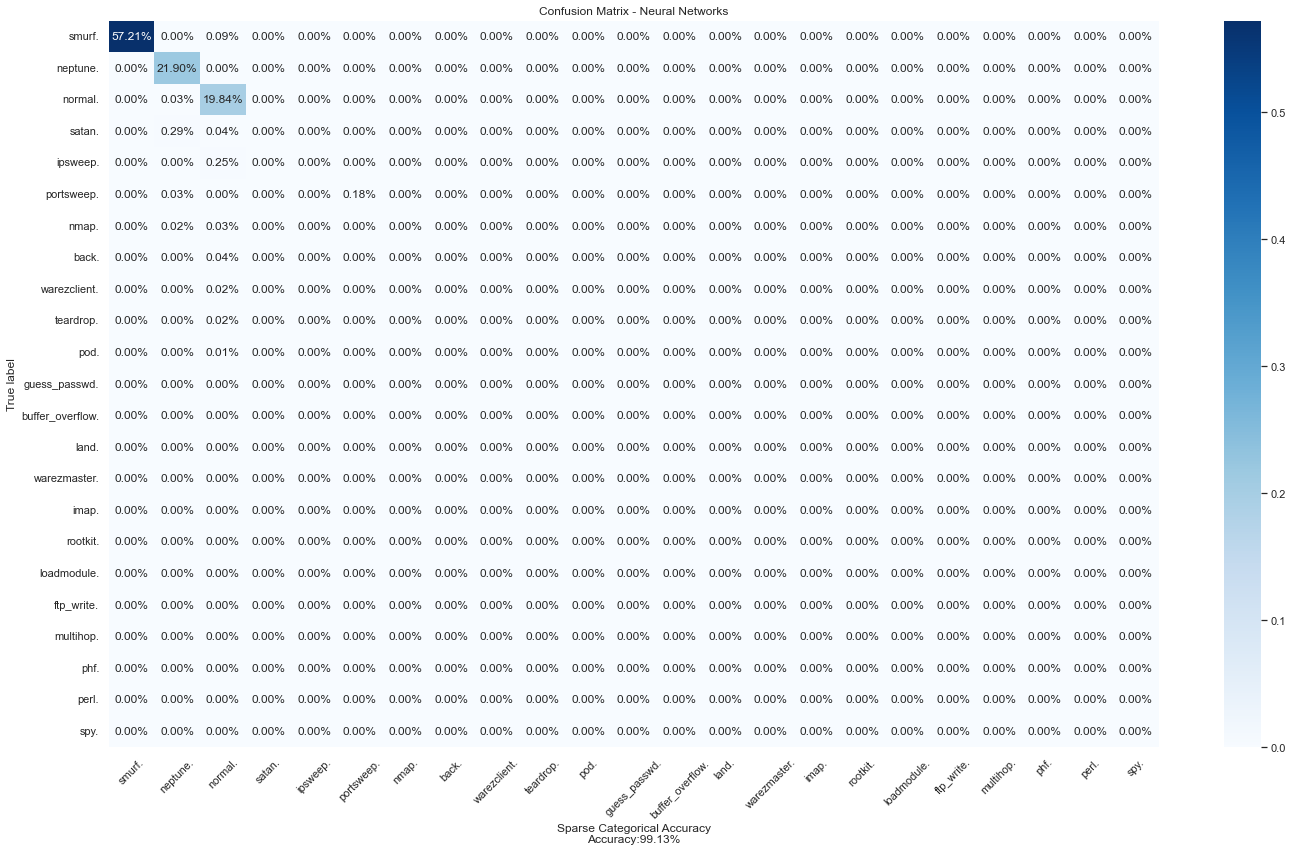

In [44]:
sns.set()
plt.figure(figsize=(20,12))
ax = sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix - Neural Networks')
ax.set_xlabel(f'Sparse Categorical Accuracy\nAccuracy:{round(acc*100,2)}%')
ax.set_ylabel('True label')

ax.yaxis.set_ticklabels(labels)
ax.xaxis.set_ticklabels(labels)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(log_file+'/confusion_matrix')
plt.show()